In [27]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import mplfinance as mpf
import matplotlib as mpl
import seaborn as sns

from definitions import RAW_DATA_DIR
from indicators import ema, rsi, stoch, stoch_k, stoch_d

btcusdt = pd.read_csv(RAW_DATA_DIR / 'BTCUSDT.csv')
btcusdt.index = pd.DatetimeIndex(btcusdt['open time'])
btcusdt.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,open time,open,high,low,close,volume
open time,,,,,,
2017-08-17 20:30:00,2017-08-17 20:30:00,4301.91,4354.84,4262.53,4346.74,15.184266
2017-08-17 21:00:00,2017-08-17 21:00:00,4346.74,4369.69,4315.85,4349.33,29.292665
2017-08-17 21:30:00,2017-08-17 21:30:00,4349.33,4369.69,4309.23,4333.55,32.480371
2017-08-17 22:00:00,2017-08-17 22:00:00,4333.55,4349.63,4310.00,4326.29,26.241174
2017-08-17 22:30:00,2017-08-17 22:30:00,4326.29,4359.13,4319.11,4336.80,31.134968


In [25]:
ema_list = []
ema_prev = ema(btcusdt, 200)
for index, row in btcusdt.iterrows():
    ema_cur = ema(btcusdt[:index], 200, ema_prev, 'low')
    ema_prev = ema_cur
    ema_list.append(ema_cur)

btcusdt['ema'] = ema_list

In [28]:
rsi_list = []
for index, row in btcusdt.iterrows():
    rsi_cur = rsi(btcusdt[:index], 14, 'low')
    rsi_list.append(rsi_cur)

btcusdt['rsi'] = rsi_list

In [6]:
stochrsi_list = []
for index, row in btcusdt.iterrows():
    stochrsi_cur = stoch(btcusdt[:index], 14)
    stochrsi_list.append(stochrsi_cur)
btcusdt['stoch'] = stochrsi_list

In [7]:
stochrsi_K_list = []
for index, row in btcusdt.iterrows():
    stochrsi_K_cur = stoch_k(btcusdt[:index], 3)
    stochrsi_K_list.append(stochrsi_K_cur)
btcusdt['stoch_k'] = stochrsi_K_list

In [9]:
stochrsi_D_list = []
for index, row in btcusdt.iterrows():
    stochrsi_D_cur = stoch_d(btcusdt[:index], 3)
    stochrsi_D_list.append(stochrsi_D_cur)
btcusdt['stoch_d'] = stochrsi_D_list

In [13]:
#overwrite
btcusdt['stoch_k'] = ema_list
btcusdt['stoch_d'] = ema_list

In [29]:
from src.models.strategies import RSIStoch200EMAResults



results = RSIStoch200EMAResults(
    asset_name='BTCUSDT',
    ohlcv_timeseries=btcusdt
)

In [30]:
start_time=btcusdt.index[-150]
end_time=btcusdt.index[-1]

KeyError: 'ema'

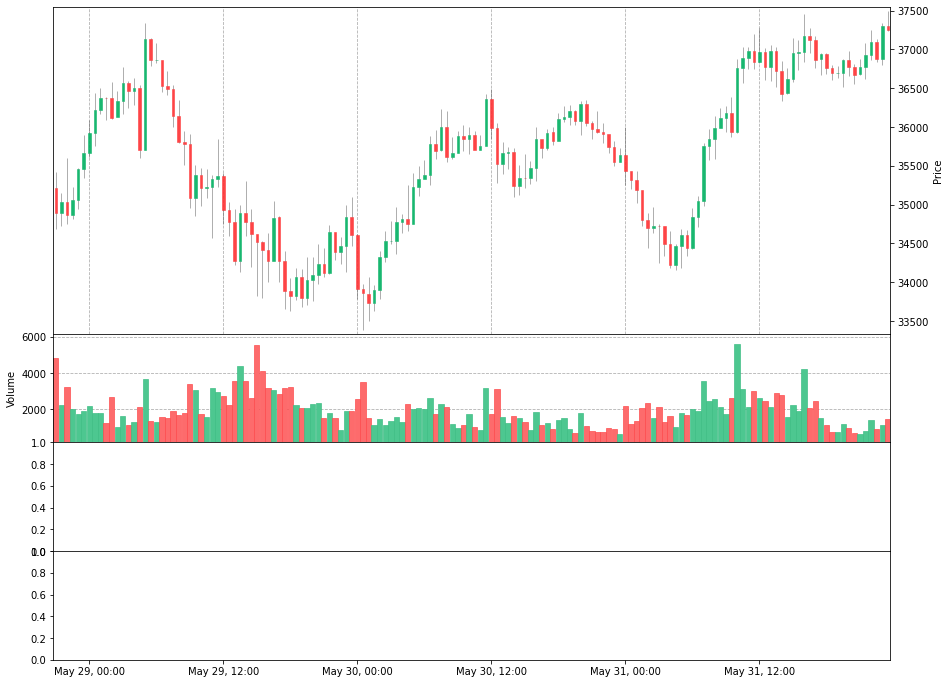

In [31]:
results.plot(start_time, end_time)

In [ ]:
entry_time = btcusdt.index[60]
entry_price = btcusdt.loc[entry_time]['close']
take_profit = entry_price + 100
stop_loss = entry_price - 50
exit_time = btcusdt.index[80]
win = False
divergence_timeframe = (btcusdt.index[40], btcusdt.index[55])

In [ ]:
entry_time = btcusdt.index[60]
entry_price = btcusdt.loc[entry_time]['close']
take_profit = entry_price + 100
stop_loss = entry_price - 50
exit_time = btcusdt.index[80]
win = False
divergence_timeframe = (btcusdt.index[40], btcusdt.index[55])
results.add_trade_and_signal(
    entry_time=entry_time,
    entry_price=entry_price,
    take_profit=take_profit,
    stop_loss=stop_loss,
    exit_time=exit_time,
    win=win,
    divergence_timeframe=divergence_timeframe
)

entry_time = btcusdt.index[30]
entry_price = btcusdt.loc[entry_time]['close']
take_profit = entry_price + 100
stop_loss = entry_price - 50
exit_time = btcusdt.index[40]
win = False
divergence_timeframe = (btcusdt.index[10], btcusdt.index[20])
results.add_trade_and_signal(
    entry_time=entry_time,
    entry_price=entry_price,
    take_profit=take_profit,
    stop_loss=stop_loss,
    exit_time=exit_time,
    win=win,
    divergence_timeframe=divergence_timeframe
)

In [ ]:
results.plot(start_time, end_time)

In [23]:
 for idn in range(15, 1, -1):
        print(idn)

15
14
13
12
11
10
9
8
7
6
5
4
3
2
